### Prediccion sobrevivientes por arbol de desiciones

En este dataset se realizara una prediccion quienes tienen mayores posibilidades de sobrevivir dentro de titanic. El modelo de machine learning se realizara por el mteodo de arbol de desiciones.



In [3]:
pip install --upgrade scikit-learn

In [6]:
#Importamos las librerias que vamos a utilizar para nuestro analisis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

## CARGA DE DATA Y LIMPIEZA DE DATA

In [7]:
#Data extraido de nuestro github
url = "https://raw.githubusercontent.com/DsRaul/Prediccion_Titanic/main/DataSet_Titanic.csv"

In [9]:
# visualizar las primeras 10 filas
Data = pd.read_csv(url)
Data.head(10)

,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
5,0,1,0,54.0,0,0
6,0,3,0,2.0,3,1
7,1,3,1,27.0,0,2
8,1,2,1,14.0,1,0
9,1,3,1,4.0,1,1


1.   **Sobreviviente**: 0 = No; 1 = Si
2.   **Clase**: 1 = Clase rica ; 2 = Clase Media ; 3 = Clase Pobre
3.   **Género**: 0 = Hombre; 1 = Mujer
4.   **Edad**: edad en años
5.   **HermEsp**: cantidad de herman@s o espos@s en el Viaje Titanic.
6.   **PadHij**: cantidad de padres o hijos en el viaje Titanic.

In [11]:
#Exploraremos un poco el data ver si tiene valores nulos y que tipo de valores tiene.
Data.isnull().sum()

Sobreviviente    0
Clase            0
Genero           0
Edad             0
HermEsp          0
PadHij           0
dtype: int64

In [16]:
# Al tener la data limpia vamos al analisis.
Data.dtypes

Sobreviviente      int64
Clase              int64
Genero             int64
Edad             float64
HermEsp            int64
PadHij             int64
dtype: object

## ANALISIS DE DATA


In [17]:
#Al tener nuestra data limpia procedemos a analizarla
#  X sera nuestras variables predictoras, excluimos la columna (axis = 1 ) sobreviviente
X = Data.drop('Sobreviviente',axis=1)
# Y sera nuestra variable a predecir
Y = Data.Sobreviviente

In [19]:
X.head(5)

,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [20]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sobreviviente, dtype: int64

In [28]:
#crearemos nuestro arbol de decisiones
Ar = DecisionTreeClassifier(max_depth= 4, random_state=49)

In [29]:
Ar.fit(X,Y)

DecisionTreeClassifier(max_depth=4, random_state=49)

In [30]:
#Predecimos sobre nuestro dataset

pred_Y = Ar.predict(X)

print('Precision: ', accuracy_score(pred_Y, Y))

Precision:  0.8207282913165266


In [32]:
#Creacion de nuestra Matrix de confusion
cm = confusion_matrix(Y, pred_Y)

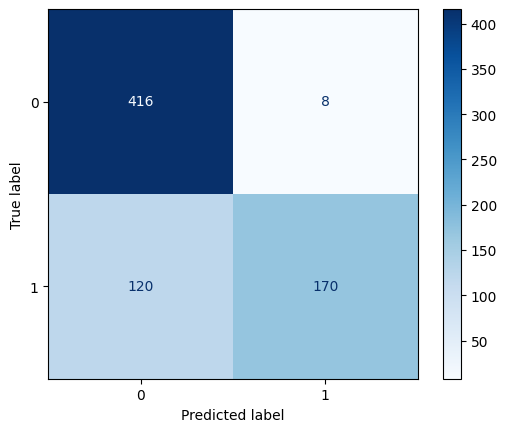

In [52]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Ar.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g')

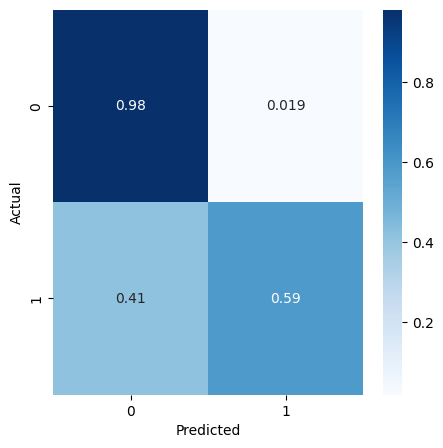

In [59]:
# Normalizando vemos que tenemos una buena cantidad de predicciones en 0 en No sobrevivientes y un valor en considerable en sobrevivientes
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2g',cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

[Text(0.45689655172413796, 0.9, 'Genero <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(0.1896551724137931, 0.7, 'Edad <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]'),
 Text(0.06896551724137931, 0.5, 'HermEsp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.034482758620689655, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.10344827586206896, 0.3, 'PadHij <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.06896551724137931, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.13793103448275862, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3103448275862069, 0.5, 'Clase <= 1.5\ngini = 0.295\nsamples = 429\nvalue = [352, 77]'),
 Text(0.2413793103448276, 0.3, 'Edad <= 53.0\ngini = 0.473\nsamples = 99\nvalue = [61, 38]'),
 Text(0.20689655172413793, 0.1, 'gini = 0.496\nsamples = 77\nvalue = [42, 35]'),
 Text(0.27586206896551724, 0.1, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.3793103448275862, 0.3, 'E

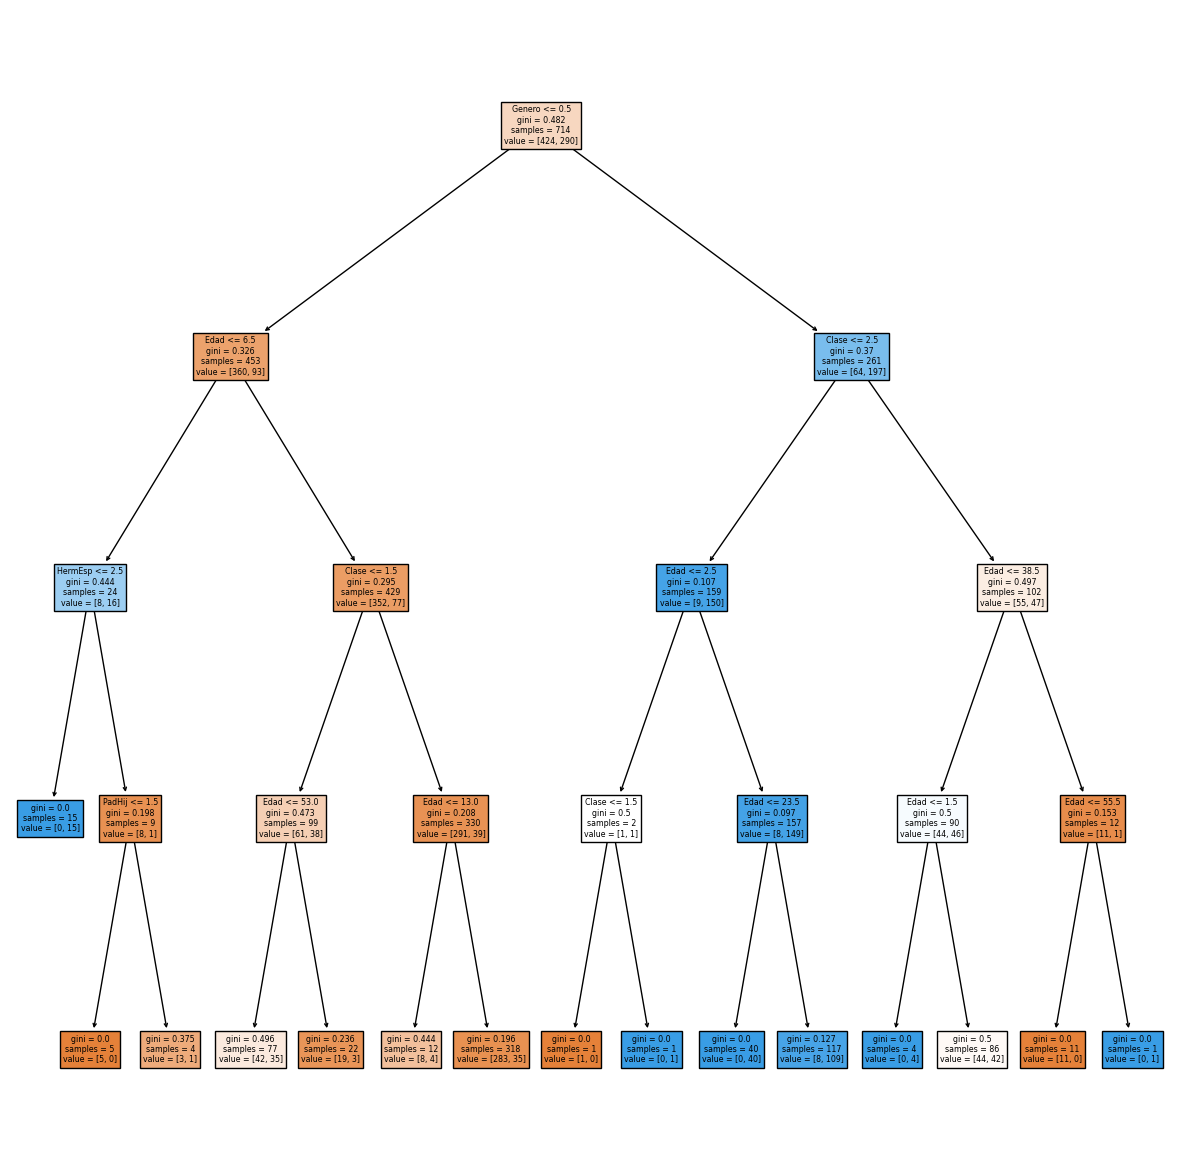

In [44]:
#plt.figure(figsize=(15,15))
tree.plot_tree(Ar, filled=True, feature_names=X.columns)

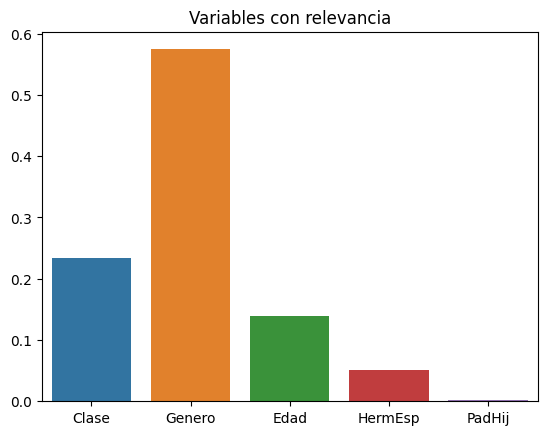

In [48]:
#La variable que tiene mayor referencia en nuestro modelo de prediccion es el genero, Seguido por la clase y la edad.
importancias = Ar.feature_importances_
Column_X = X.columns

sns.barplot(x=Column_X, y=importancias)
plt.title('Variables con relevancia')
plt.show()

# CONCLUSIONES


1.   Tenemos un modelo con el 82% de predicion
2.   El genero mujer tiene la mayor posibilidad de sobrevivir.
3.   La Clase rica tiene la mayor posibilidad de sobrevivir.
4.   Los niños tambien tienen mayor posibilidad de sobrevivir
5.   Si eres hombre, clase pobre y mayor de edad estas condenado a morir.